In [81]:
import numpy as np
import pandas as pd

# Customer Personality Analysis Dataset

Load dataset

In [37]:
df = pd.read_csv("./marketing_campaign.csv",delimiter="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [39]:
#removing duplicates
df.drop_duplicates(inplace=True)

The dataset has $2237$ fields. We have some missing values for the attribute "Income". We can keep them. We only remove when we consider the attribute income in our analysis.

## Attributes

There are 29 attributes, we can divide them into 4 macro-categories: 
* People

    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if customer complained in the last 2 years, 0 otherwise

* Products

    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years

* Promotion

    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

    * NumWebPurchases: Number of purchases made through the company’s web site
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s web site in the last month

## Exploring data (people)

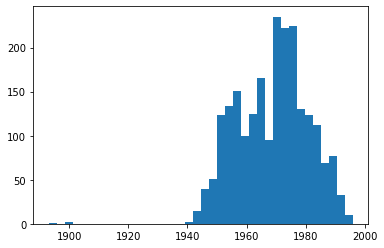

In [40]:
import matplotlib.pyplot as plt
plt.hist(df['Year_Birth'],bins="auto");

There are two outliers: they are probably data entry errors (human errors while collecting data). We remove them.

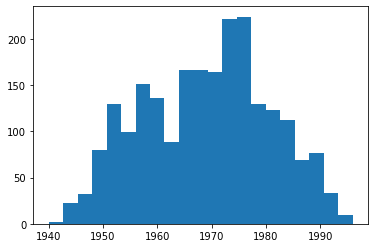

In [41]:
mask = df['Year_Birth'] > 1920
df = df[mask]
plt.hist(df['Year_Birth'],bins="auto");

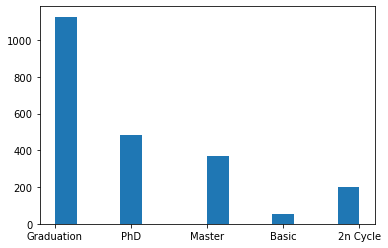

In [42]:
plt.hist(df['Education'],bins="auto");

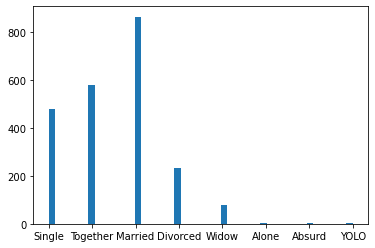

In [43]:
plt.hist(df['Marital_Status'],bins="auto");

From the histogram we can see strange values such as 'Alone', 'Absurd', 'YOLO', we assume that are human errors and we can remove them without affecting our analysis.

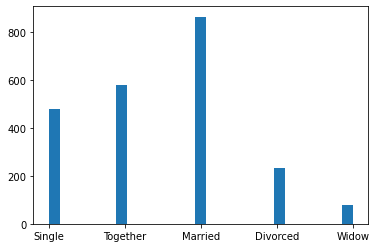

In [53]:
alone = df['Marital_Status'] == 'Alone'
df = df[~alone]
absurd = df['Marital_Status'] == 'Absurd'
df = df[~absurd]
yolo =  df['Marital_Status'] == 'YOLO'
df = df[~yolo]
plt.hist(df['Marital_Status'],bins="auto");

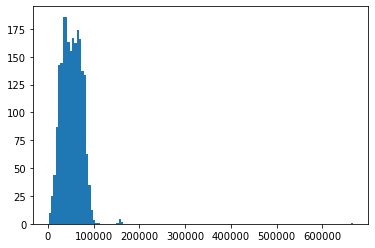

In [57]:
plt.hist(df['Income'],bins="auto");

There's one value with income = 666666, since it's an outlier and many algorithms are sensitive to outliers we remove it.

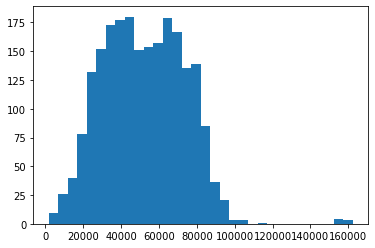

In [61]:
income = df['Income'] > 200000
df = df[~income]
plt.hist(df['Income'],bins="auto");

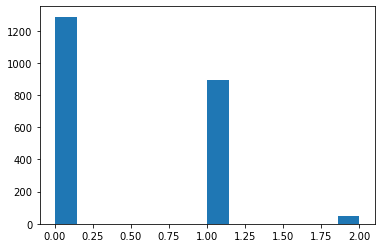

In [62]:
plt.hist(df['Kidhome'],bins="auto");

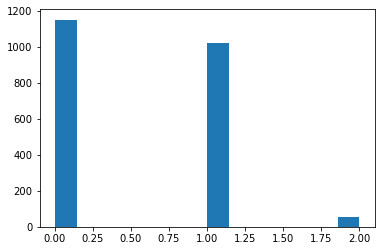

In [63]:
plt.hist(df['Teenhome'],bins="auto");

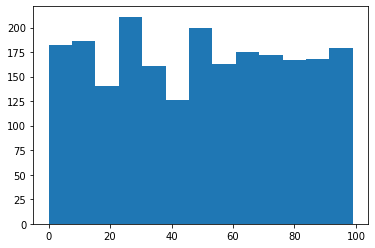

In [65]:
plt.hist(df['Recency'],bins="auto");

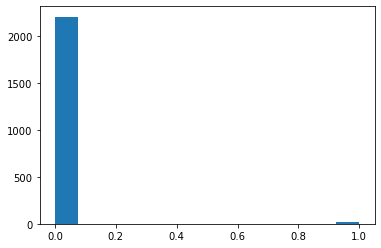

In [66]:
plt.hist(df['Complain'],bins="auto");

## Exploring data (Products)

Text(0, 0.5, 'freq')

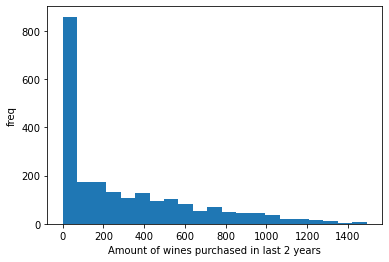

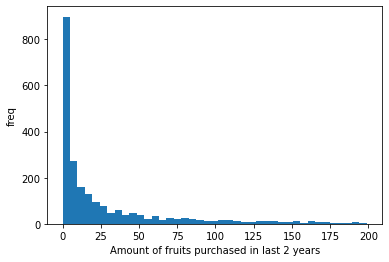

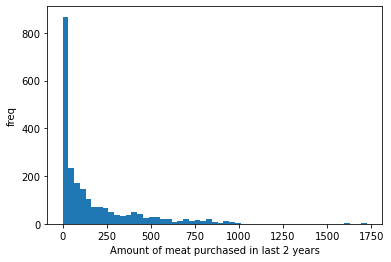

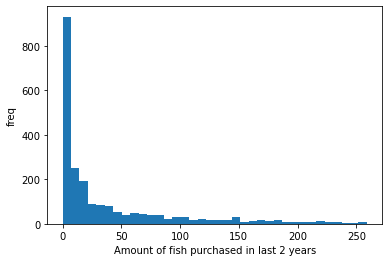

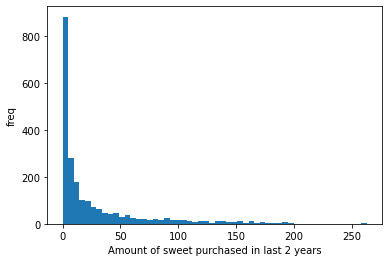

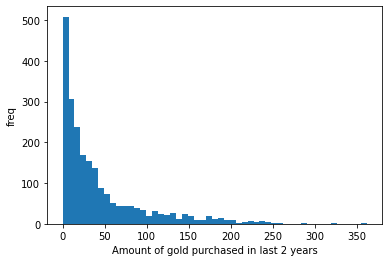

In [74]:
plt.figure(1)
plt.hist(df['MntWines'],bins="auto");
plt.xlabel("Amount of wines purchased in last 2 years")
plt.ylabel("freq")

plt.figure(2)
plt.hist(df['MntFruits'],bins="auto");
plt.xlabel("Amount of fruits purchased in last 2 years")
plt.ylabel("freq")

plt.figure(3)
plt.hist(df['MntMeatProducts'],bins="auto");
plt.xlabel("Amount of meat purchased in last 2 years")
plt.ylabel("freq")

plt.figure(4)
plt.hist(df['MntFishProducts'],bins="auto");
plt.xlabel("Amount of fish purchased in last 2 years")
plt.ylabel("freq")

plt.figure(5)
plt.hist(df['MntSweetProducts'],bins="auto");
plt.xlabel("Amount of sweet purchased in last 2 years")
plt.ylabel("freq")

plt.figure(6)
plt.hist(df['MntGoldProds'],bins="auto");
plt.xlabel("Amount of gold purchased in last 2 years")
plt.ylabel("freq")

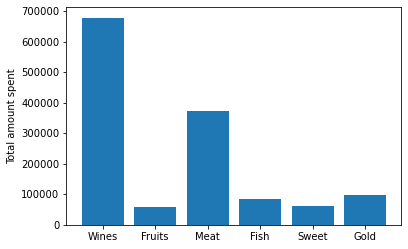

In [89]:
w = df['MntWines'].sum()
f = df['MntFruits'].sum()
m = df['MntMeatProducts'].sum()
fi = df['MntFishProducts'].sum()
s = df['MntSweetProducts'].sum()
g = df['MntGoldProds'].sum()
y = np.array([w,f,m,fi,s,g])
x = np.array(["Wines","Fruits","Meat","Fish","Sweet","Gold"])
plt.ylabel("Total amount spent")
plt.bar(x,y);